3.1) 신경망의 구조 
==============

1) 네트워크(또는 모델)를 구성하는 층
2) 입력 데이터와 그에 상응하는 타깃
3) 학습에 사용할 피드백 신호를 정의하는 손실 함수
4) 학습 진행 방식을 결정하는 옵티마이저

층 : 딥러닝의 구성 단위
==> 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈

가중치 : 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서이며, 네트워크가 학습한 지식이 담겨 있음.

(samples, features) 크기의 2D 텐서가 저장된 간단한 벡터 데이터
==> 완전연결 층,밀집 연결 층

(samples, timesteps, features) 크기의 3D 텐서로 저장된 시퀀스 데이터
==> 순환 층

4D 텐서로 저장되어 있는 이미지 데이터 ==> 2D 합성곱 층

층 호환성 : 각 층이 특정 크기의 입력텐서만 받고 특정 크기의 출력 텐서를 반환하는 사실

모델 : 층의 네트워크
==> 네트워크 구조는 가설 공간 정의 후 구조를 선택함으로써 가능성 있는 공간을 입력 데이터에서 출력데이터로 매핑하는 일련의 특정 텐서 연산으로 제한

손실 함수와 옵티마이저 : 학습 과정을 조절하는 열쇠
* 손실 함수(목적 함수) : 훈련하는 동안 최소화될 값. 주어진 문제에 대한 성공지표가됨
* 옵티마이저 : 손실 함수를 기반으로 네트워크가 어떻게 업데이트 될지 결정.
  특정 종류의 확률적 경사 하강법을 구현
  
3.2) 케라스 소개
================
케라스 : 거의 모든 종류의 딥러닝 모델을 간편하게 만들고 훈련시킬 수 있는 파이썬을 위한 딥러닝 프레임워크

특징 : 동일한 코드로 CPU와 GPU에서 실행가능, 사용하기 쉬운 API를 가지고 있음, 
합성곱 신경망, 순환 신경망을 지원하며 이 둘을 자유롭게 조합하여 사용 가능
어떤 딥러닝 모델에도 적합

3.3) 딥러닝 컴퓨터 셋팅
=========================
주피터 노트북 : 딥러닝 실험, 책의 예제 코드를 위한 최적의 방법

3.4) 영화 리뷰 분류 : 이진 분류 예제
============================




## 3.4.1 IMDB 데이터셋
IMDB 데이터셋 : 인터넷 영화 데이터셋으로 부터 가져온 양극단의 리뷰 5만 개로 이루어져 있고 훈련 데이터 25000개와 테스트 데이터 2만 5000개로 나뉘어져 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있음. 이미 사전에 처리된 입력데이터를 기반으로 네트워크 설계. 



코드 3-1 IMDB 데이터셋 로드하기

In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 3.4.2 데이터 준비
데이터 가공 및 처리 : 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환 후 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용
이 후에 리스트를 원-핫 인코딩 하여 0과 1의 벡터로 변환

코드 3-2 정수 시퀀스를 이진 행렬로 인코딩하기

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3.4.3 신경망 모델 만들기

relu 활성화 함수를 사용한 완전 연결 층을 사용 (3개의 층으로 된 신경망 사용)

=> 입력층은 입력데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영
출력층은 확률을 출력하기 위해 시그모이드 활성화 함수를 사용

(시그모이드는 임의의 값을 [0, 1] 사이로 압축하므로 출력 값을 확률처럼 해석 가능

코드 3-3 모델 정의하기

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0729 09:41:14.142274  8496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 09:41:14.206473  8496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 09:41:14.225986  8496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



코드 3-4 모델 컴파일하기

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0729 09:41:15.723597  8496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 09:41:15.756574  8496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0729 09:41:15.764482  8496 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


코드 3-5 옵티마이저 설정하기

In [15]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

코드 3-6 손실과 측정을 함수 객체로 지정하기

In [16]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 3.4.4 훈련 검증

코드 3-7 검증 세트 준비하기

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

코드 3-8 모델 훈련하기

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0729 09:41:21.017831  8496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 340us/step - loss: 0.4975 - acc: 0.7953 - val_loss: 0.3715 - val_acc: 0.8725
Epoch 2/20
15000/15000 [==============================] - 4s 256us/step - loss: 0.2957 - acc: 0.9045 - val_loss: 0.2990 - val_acc: 0.8912
Epoch 3/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3087 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.1742 - acc: 0.9435 - val_loss: 0.2831 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.1415 - acc: 0.9541 - val_loss: 0.2863 - val_acc: 0.8853
Epoch 6/20
15000/15000 [==============================] - 3s 230us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3092 - val_acc: 0.8809
Epoch 7/20
15000/15000 [==============================] - 4s 286us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

코드 3-9 훈련과 검증 손실 그리기

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

코드 3-10 훈련과 검증 정확도 그리기

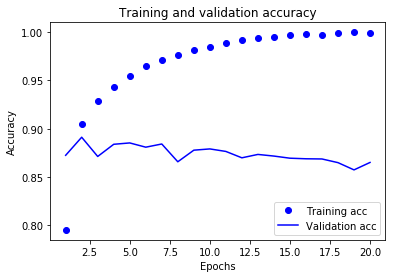

In [20]:
plt.clf()   
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

코드 3-11 모델을 처음부터 다시 훈련하기

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.1982 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 4s 159us/step


In [22]:
results

[0.3235300407791138, 0.87348]

## 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

예측하고자 하는 방법
==> predict 메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있음.

In [23]:
model.predict(x_test)

array([[0.14017415],
       [0.9997022 ],
       [0.2928373 ],
       ...,
       [0.07205564],
       [0.0433065 ],
       [0.48037794]], dtype=float32)


3.5) 뉴스 기사 분류 : 다중 분류 문제
============================

## 3.5.1 로이터 데이터셋
로이터 데이터셋 : 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합
46개의 토픽이 있으며, 어떤 토픽은 다른 것에 비해 데이터가 많고, 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있음. 훈련 샘플이 8982개, 테스트 샘플이 2246개 보유.


코드 3-12 로이터 데이터셋 로드하기

In [24]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [25]:
len(train_data)

8982

In [26]:
len(test_data)

2246

In [27]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

코드 3-13 로이터 데이터셋을 텍스트로 디코딩하기

In [28]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

## 3.5.2 데이터 준비

데이터 가공 및 처리 : 레이블의 리스트를 정수텐서로 변환하는 것과 원-핫 인코딩을 사용해서 데이터를 가공.

(원-핫 인코딩 : 단어 집합의 크기를 벡터의 차원으로하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식)

코드 3-14 데이터 인코딩하기

In [29]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [30]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## 3.5.3 모델 구성

출력 클래스의 개수가 2에서 46개로 늘어나서 출력 공간의 차원이 커져서 마지막 출력 층의 크기는 46이 되고 softmax 활성화 함수가 사용됨.


코드 3-15 모델 정의하기

In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

코드 3-16 모델 컴파일하기

In [32]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 3.5.4 훈련 검증

코드 3-17 검증 세트 준비하기

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

코드 3-18 모델 훈련하기

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 183us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7204 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 126us/step - loss: 1.4450 - acc: 0.6878 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.0951 - acc: 0.7648 - val_loss: 1.1704 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.8695 - acc: 0.8161 - val_loss: 1.0795 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.7032 - acc: 0.8480 - val_loss: 0.9846 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.5665 - acc: 0.8795 - val_loss: 0.9409 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.4580 - acc: 0.9049 - val_loss: 0.9074 - val_acc: 0.8010


코드 3-19 훈련과 검증 손실 그리기

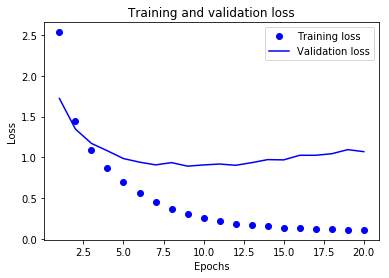

In [35]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

코드 3-20 훈련과 검증 정확도 그리기

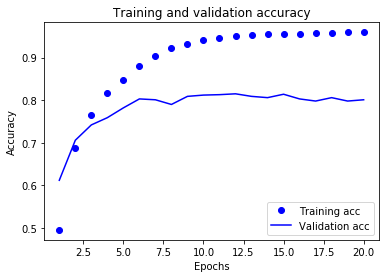

In [36]:
plt.clf()   

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

코드 3-21 모델을 처음부터 다시 훈련하기


In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 166us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 128us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 127us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [38]:
results

[1.0227517058354665, 0.7756010686194165]

In [39]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.182546749777382

## 3.5.5 새로운 데이터에 대해 예측하기

코드 3-22 새로운 데이터에 대해 예측하기

In [40]:
predictions = model.predict(x_test)

In [41]:
predictions[0].shape

(46,)

In [42]:
np.sum(predictions[0])

0.99999976

In [43]:
np.argmax(predictions[0])

3

## 3.5.6 레이블과 손실을 다루는 다른 방법

In [44]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [45]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

## 3.5.7 충분히 큰 중간층을 두어야 하는 이유

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 212us/step - loss: 2.6576 - acc: 0.3773 - val_loss: 1.9684 - val_acc: 0.5280
Epoch 2/20
7982/7982 [==============================] - 1s 184us/step - loss: 1.6652 - acc: 0.6211 - val_loss: 1.5409 - val_acc: 0.6230
Epoch 3/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.3324 - acc: 0.6706 - val_loss: 1.3951 - val_acc: 0.6790
Epoch 4/20
7982/7982 [==============================] - 1s 182us/step - loss: 1.1420 - acc: 0.7269 - val_loss: 1.3235 - val_acc: 0.6970
Epoch 5/20
7982/7982 [==============================] - 1s 179us/step - loss: 1.0109 - acc: 0.7457 - val_loss: 1.2704 - val_acc: 0.7010
Epoch 6/20
7982/7982 [==============================] - 1s 188us/step - loss: 0.9098 - acc: 0.7580 - val_loss: 1.2778 - val_acc: 0.7070
Epoch 7/20
7982/7982 [==============================] - 2s 207us/step - loss: 0.8304 - acc: 0.7742 - val_loss: 1.2595 - val_acc: 0.7080



3.6) 주택 가격 예측 : 회귀 문제
============================

## 3.6.1 보스턴 주택 가격 데이터셋
보스턴 주택 가격 데이터셋 : 데이터 포인트가 506개로 비교적 개수가 적고 404개는 훈련 샘플로, 102개는 테스트 샘플로 나뉘어 있음. 보스턴 시의 주택 가격에 대한 데이터이며 주택의 여러가지 요건들과 주택의 가격 정보가 포함되어 있음. 보스턴 주택 데이터는 회귀분석 등의 분석에 활용될 수 있음. 14개의 변수로 이루어져 있음.

입력 데이터에 있는 각 특성은 스케일이 서로 다름.

코드 3-24 보스턴 주택 데이터셋 로드하기

In [47]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [48]:
train_data.shape

(404, 13)

In [49]:
test_data.shape

(102, 13)

In [50]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 3.6.2 데이터 준비

데이터 가공 및 처리 : 상이한 스케일을 가진 값을 신경망에 주입하게 되면 문제가 되기때문에 특성별로 정규화. 입력 데이터에 있는 각특성에 대해서 특성의 평균을 빼고 표준 편차로 나눔. 특성의 중앙이 0 근처에 맞춰지고 표준 편차가 1이됨.                     

코드 3-25 데이터 정규화하기

In [51]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 3.6.3 모델 구성

샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성

==> 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 한 방법

마지막 출력층은 하나의 유닛을 가지고 있고 활성화 함수가 없음.(스칼라 회귀를 위한 구성)

코드 3-26 모델 정의하기

In [52]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## 3.6.4 K-겹 검증을 사용한 훈련 검증

코드 3-27 K-겹 검증하기

In [53]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
  
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [54]:
all_scores

[2.094009795991501, 2.1723296831149868, 2.906362672843555, 2.419065172129338]

In [55]:
np.mean(all_scores)

2.3979418310198453

코드 3-28 각 폴드에서 검증 점수를 로그에 저장하기

In [56]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


코드 3-29 K-겹 검증 점수 평균을 기록하기

In [57]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

코드 3-30 검증 점수 그래프

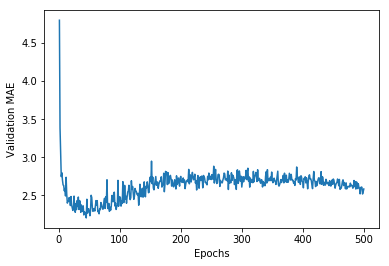

In [58]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

코드 3-31 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기

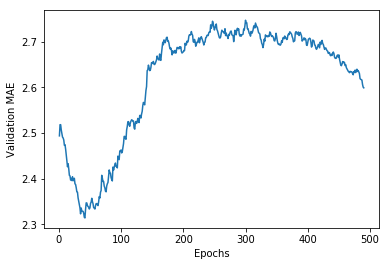

In [59]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

코드 3-32 최종 모델 훈련하기

In [60]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [61]:
test_mae_score

2.68205254685645